# Import Necessary Libraries

In [1]:
import os
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

2023-07-28 01:00:24.820770: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


# Define constants

In [2]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 30
TRAIN_DIR = 'train'
VAL_DIR = 'valid'

# Define data generators for training and validation sets

In [3]:
train_datagen = ImageDataGenerator(  rescale=1./255,
                                     rotation_range=20,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

In [4]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                     target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                     batch_size=BATCH_SIZE,
                                                     class_mode='categorical')

Found 70295 images belonging to 38 classes.


In [6]:
val_generator = val_datagen.flow_from_directory(VAL_DIR, 
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical')

Found 17572 images belonging to 38 classes.


# Build the model

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE,IMAGE_SIZE, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(38, activation='softmax'))

2023-07-28 01:00:41.253691: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-07-28 01:00:41.255531: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-07-28 01:00:41.682452: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:927] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-28 01:00:41.682512: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.515GHz coreCount: 14 deviceMemorySize: 4.00GiB deviceMemoryBandwidth: 178.84GiB/s
2023-07-28 01:00:41.682529: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-07-28 01:00:41.716170: I tensorflow/stream_executor/platfo

# Compile the model

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model

In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=50, verbose=1)
mc = ModelCheckpoint(filepath="model.h5",
                     monitor= 'val_accuracy',
                     min_delta= 0.01,
                     patience=50,
                     verbose=1,
                     save_best_only= True)
cb = [es,mc]

In [10]:
from keras.models import load_model
new_model = load_model("model.h5")

In [11]:
history = new_model.fit(train_generator, 
                         steps_per_epoch=len(train_generator),
                         epochs=10,
                         verbose=1,
                         callbacks=cb,
                         validation_data=val_generator,
                         validation_steps=len(val_generator))

2023-07-28 01:01:52.211618: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-07-28 01:01:52.213721: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2994275000 Hz


Epoch 1/10


2023-07-28 01:01:52.497957: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-07-28 01:01:53.196553: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


2197/2197 [==============================] - 1611s 732ms/step - loss: 0.1383 - accuracy: 0.9617 - val_loss: 0.0561 - val_accuracy: 0.9833

Epoch 00001: val_accuracy improved from -inf to 0.98333, saving model to model.h5
Epoch 2/10
2197/2197 [==============================] - 1094s 498ms/step - loss: 0.1414 - accuracy: 0.9610 - val_loss: 0.0723 - val_accuracy: 0.9793

Epoch 00002: val_accuracy did not improve from 0.98333
Epoch 3/10
2197/2197 [==============================] - 1098s 500ms/step - loss: 0.1416 - accuracy: 0.9605 - val_loss: 0.1083 - val_accuracy: 0.9750

Epoch 00003: val_accuracy did not improve from 0.98333
Epoch 4/10
2197/2197 [==============================] - 1095s 499ms/step - loss: 0.1309 - accuracy: 0.9628 - val_loss: 0.0831 - val_accuracy: 0.9778

Epoch 00004: val_accuracy did not improve from 0.98333
Epoch 5/10
2197/2197 [==============================] - 1087s 495ms/step - loss: 0.1389 - accuracy: 0.9622 - val_loss: 0.0854 - val_accuracy: 0.9762

Epoch 00005: v

In [12]:
h = history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

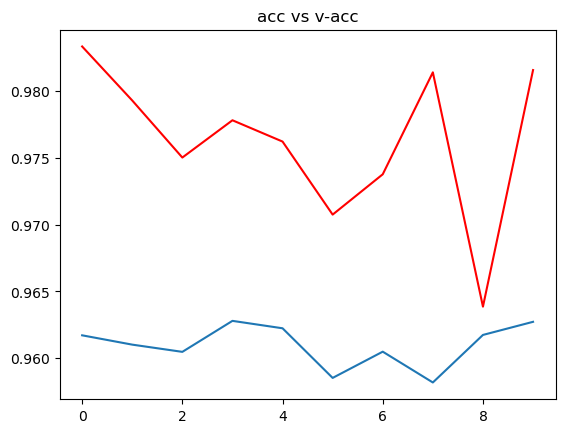

In [13]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("acc vs v-acc")
plt.show()

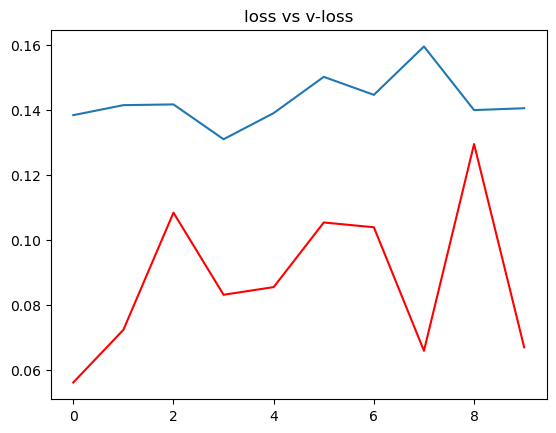

In [14]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs v-loss")
plt.show()

In [15]:
dict(zip(list(train_generator.class_indices.values()),list(train_generator.class_indices.keys())))

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [16]:
ref = dict(zip( list(train_generator.class_indices.values()),list(train_generator.class_indices.keys())))

In [17]:
def prediction(path):
    img = load_img(path, target_size= (224,224))
    i = img_to_array(img)
    im = preprocess_input(i)
    img = np.expand_dims(im, axis= 0)
    pred = np.argmax(model.predict(img))
    print(f" the image belongs to {ref[pred] }")

In [18]:
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
path = "test/AppleCedarRust1.JPG"
prediction(path)

 the image belongs to Apple___healthy
